In [9]:
import matplotlib.pyplot as plt
import os
from PIL import Image,ImageFilter
import numpy as np
import cv2
import xml.etree.ElementTree as ET

%matplotlib inline

In [31]:
#!/usr/bin/env python 
# -*- coding: utf-8 -*- 
# @Time : 7/10/2018 16:14 PM 
# @Author : sunyonghai 
# @File : draw_bbox.py 
# @Software: ZJ_AI
# =========================================================


def read_data(data_path):
    all_imgs = []
    print('Parsing annotation files')
    annot_path = os.path.join(data_path, 'Annotations')
    imgs_path = os.path.join(data_path, 'JPEGImages')
    imgs_out_path = os.path.join(data_path, 'JPEGImages_with_bbox')
    if not os.path.exists(imgs_out_path):
         os.makedirs(imgs_out_path)
            
    annots = [os.path.join(annot_path, s) for s in os.listdir(annot_path)]
    for annot in annots:
        try:
            et = ET.parse(annot)
            element = et.getroot()

            element_objs = element.findall('object')
            element_filename = element.find('filename').text
            element_width = int(element.find('size').find('width').text)
            element_height = int(element.find('size').find('height').text)

            if len(element_objs) > 0:
                # annotation format 封装后的注释格式
                annotation_data = {'filepath': os.path.join(imgs_path, element_filename),
                                   'file_out_path': os.path.join(imgs_out_path, element_filename),
                                   'width': element_width,
                                   'height': element_height,
                                   'bboxes': []}

            for element_obj in element_objs:
                class_name = element_obj.find('name').text
                obj_bbox = element_obj.find('bndbox')
                x1 = int(round(float(obj_bbox.find('xmin').text)))
                y1 = int(round(float(obj_bbox.find('ymin').text)))
                x2 = int(round(float(obj_bbox.find('xmax').text)))
                y2 = int(round(float(obj_bbox.find('ymax').text)))
                # annotation format of bounding box 矩形框的封装格式
                annotation_data['bboxes'].append(
                    {'class': class_name,
                     'x1': x1,
                     'x2': x2,
                     'y1': y1,
                     'y2': y2})
            all_imgs.append(annotation_data)

            image = cv2.imread(annotation_data['filepath'])
            for bbox in annotation_data['bboxes']:
                cv2.rectangle(image, (bbox['x1'], bbox['y1']), (bbox['x2'], bbox['y2']), (55,255,155),1)
                # 各参数依次是：照片/添加的文字/左上角坐标/字体/字体大小/颜色/字体粗细
                text = '{} - {},{}'.format(bbox['class'],(bbox['x1'], bbox['y1']), (bbox['x2'], bbox['y2']))
                cv2.putText(image, text, (bbox['x1']-5, bbox['y1']-5), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 255, 0), 1)
            print(annotation_data['file_out_path'])
            cv2.imwrite(annotation_data['file_out_path'], image)

        except Exception as e:
            print('Exception in pascal_voc_parser: {}'.format(e))
            continue

if __name__ == "__main__":
    data_path ='/home/syh/train_data/VOCdevkit/VOC2007'
    read_data(data_path)

Parsing annotation files
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008352.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009254.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009702.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003193.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003103.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009385.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002075.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005937.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002794.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003465.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009588.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001158.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004029.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_wi

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005258.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002624.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008163.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001097.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001073.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006226.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007662.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006767.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000425.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004155.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001774.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005296.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007056.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004582.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004796.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004151.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005353.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009175.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002957.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008902.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000946.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008820.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001054.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005859.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006038.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000740.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002221.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005317.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009906.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004471.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006820.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002260.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004257.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006179.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008128.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007116.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001713.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005080.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003127.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002577.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005817.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004530.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002048.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006744.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001618.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009613.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003161.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003386.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004561.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007891.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009183.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002266.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003320.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008718.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009685.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002556.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001285.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001218.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002724.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007883.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000742.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002696.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000833.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008416.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008468.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001230.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005020.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003780.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009642.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001827.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006425.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009852.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001481.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008987.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000404.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008741.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004220.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000570.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009342.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005865.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001151.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008003.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005244.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000844.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007851.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008626.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000863.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008174.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000867.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009913.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007406.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000113.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008943.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005180.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000378.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002149.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002397.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001368.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003017.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002111.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008866.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004849.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000561.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001145.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007632.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001955.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002974.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007418.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008925.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005573.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007844.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009803.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008853.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001200.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005521.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003077.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008972.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006806.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000837.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000767.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000136.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001761.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009534.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007956.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003948.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006901.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007010.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007964.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007979.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008272.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008566.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003026.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001743.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006475.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005281.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003182.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007219.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003519.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004799.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004658.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008817.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008314.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003124.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004950.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005646.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000051.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002447.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006594.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005730.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005823.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006695.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000698.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008871.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005750.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000198.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004966.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006269.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006600.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007499.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000733.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004778.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005379.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006992.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007642.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000768.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001496.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002989.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001513.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005600.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002644.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006725.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004924.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007861.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001556.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006310.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000487.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007630.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002456.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002365.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006521.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007972.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009770.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004242.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009332.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008460.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001202.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007937.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007573.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006212.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007553.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004678.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003289.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008213.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005138.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000971.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005006.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006070.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002133.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003693.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002623.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005322.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004225.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000775.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002512.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000247.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009645.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004668.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000017.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008768.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004945.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008680.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003378.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001099.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007570.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005493.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000038.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001118.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003879.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000563.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001791.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001369.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008403.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001775.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001053.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001820.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001650.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009173.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002914.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002735.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007177.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002206.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001274.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005350.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005110.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003814.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007857.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008750.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005381.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009508.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006969.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003071.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008114.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007363.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004802.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007181.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000383.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002161.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008418.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009421.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004172.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007987.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002569.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004555.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002217.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007527.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004670.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003837.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000856.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003503.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003580.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007731.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004549.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009657.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004118.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007692.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005355.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007969.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002027.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006971.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006692.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005427.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006807.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007146.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002931.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003357.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002002.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001765.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007009.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009944.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002280.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003877.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007924.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006037.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004861.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007232.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002753.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002413.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000161.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007965.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003943.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004817.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004506.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006235.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001589.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005854.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007706.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003628.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005358.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006095.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009737.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001778.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009009.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006727.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001500.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006466.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002581.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001888.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009012.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008833.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001017.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002350.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004820.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004740.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000889.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004968.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006356.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004822.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008603.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007003.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006558.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002360.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000914.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001937.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003994.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009046.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000001.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002866.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004397.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004064.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008323.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003518.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002680.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009275.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003128.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000178.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007546.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004605.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006153.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006623.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001074.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009218.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009309.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006698.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002971.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004353.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007752.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001372.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008720.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005980.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005116.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003855.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009686.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005904.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001110.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000224.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004303.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008189.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009860.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007107.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001208.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005841.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006092.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009163.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009463.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006151.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001390.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005189.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007024.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003019.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005648.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009763.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008236.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001317.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005368.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008153.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000596.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005192.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006220.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003536.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002565.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005039.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001766.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006567.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003305.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000554.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004405.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009126.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008135.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009306.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004138.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009315.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006655.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002649.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001897.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006445.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001883.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009100.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001617.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007667.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005763.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008876.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002668.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003697.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009519.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005666.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009578.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004196.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005850.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006681.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009811.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005320.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001891.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005156.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002777.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008675.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004524.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008089.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003309.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009861.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007186.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005525.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002517.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002082.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002287.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003452.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006003.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000587.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004828.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007738.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000876.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001360.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006043.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007563.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002064.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001199.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002952.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003931.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009181.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005146.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008172.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004221.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008816.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005215.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008113.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007168.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008650.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009843.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005032.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009727.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007281.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000413.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001691.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001872.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005680.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002901.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004904.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001254.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000929.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004990.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001144.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003045.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004922.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000731.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004761.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001212.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007888.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008783.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003516.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004431.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004634.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002158.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005570.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003765.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009793.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004336.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003533.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001486.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002041.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006530.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004199.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009548.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006931.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001567.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009223.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005026.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002015.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008683.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001030.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004375.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008357.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009087.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002958.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006381.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001758.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006608.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006221.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007348.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003333.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002333.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003360.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006914.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004244.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001805.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003358.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002977.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007728.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000332.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004663.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006405.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000549.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006450.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009092.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000234.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008555.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002840.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001269.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008690.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004830.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003553.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003330.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000757.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004347.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005546.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003349.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004937.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003468.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009521.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009618.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006980.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002035.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006115.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006910.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005566.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008194.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001184.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000658.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005664.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004548.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001119.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008401.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003913.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001629.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001019.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001059.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004255.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007160.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003257.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007852.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003514.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008125.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008505.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000171.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007425.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009401.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004562.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009289.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005376.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003322.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007488.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001168.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001356.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008166.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002795.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005260.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009109.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002361.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008911.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001822.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008942.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008592.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005829.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003956.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003779.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001859.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005925.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006945.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003082.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009555.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003359.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006124.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006250.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002123.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001359.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002213.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007877.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000068.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001279.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007843.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001604.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002809.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009846.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005422.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007670.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004554.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006342.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002264.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005417.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005657.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004608.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007997.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002926.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005759.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003284.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008269.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007869.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009569.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003841.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005029.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000697.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008656.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004337.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009509.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009757.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002576.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004993.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001316.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001142.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002490.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008556.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008827.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007377.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002362.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003504.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000260.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008508.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003946.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006089.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000325.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000910.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000994.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002469.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005778.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001159.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004656.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000834.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005301.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002601.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000695.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004163.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004035.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005906.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004311.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000146.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009690.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005582.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009668.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003899.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005238.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000003.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004167.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000605.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006835.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000373.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006579.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006837.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005307.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007629.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008048.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005344.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009152.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006439.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006077.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005682.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001140.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006011.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000735.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000499.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000903.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005287.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000030.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001418.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000907.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009599.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008554.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002771.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008492.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000622.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009845.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007761.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000042.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003823.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003171.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008124.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002500.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008033.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006761.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007769.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002588.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005628.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006031.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007388.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003993.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009632.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005248.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008620.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008141.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000046.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005038.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002589.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004874.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009767.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004187.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008652.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000647.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000466.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002979.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009177.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002079.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000665.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001347.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000494.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000164.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007354.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006602.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003804.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006389.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006294.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003217.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000240.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006484.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003411.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006546.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004540.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005211.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007572.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007038.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000360.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008242.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000922.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005845.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005846.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003708.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000446.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008105.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008310.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005174.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003688.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000381.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003141.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005691.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005954.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000351.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008573.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006780.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008630.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005638.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004216.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008540.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003651.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002734.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006774.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009108.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001837.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000816.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009202.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001340.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006465.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007482.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007368.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008685.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000123.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000641.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008413.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004154.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000615.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001420.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001704.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009557.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004181.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008324.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002619.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001968.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008265.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001191.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003256.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004770.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000340.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002438.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001284.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008389.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000022.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003277.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003486.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008860.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004374.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007536.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008552.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004839.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006264.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003422.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005008.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003854.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003397.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004120.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000119.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002932.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007356.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008155.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007825.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005879.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009115.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001690.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005118.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007902.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007800.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004889.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002524.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003616.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007319.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005562.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004312.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000109.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003508.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004660.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001722.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001826.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004424.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002702.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007689.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003952.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002239.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001032.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003364.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000266.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006907.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001345.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006184.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004093.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009827.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003852.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008090.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004362.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003525.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005652.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003375.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001878.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004359.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001520.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000593.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009366.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001642.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005543.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006501.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007741.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007041.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006838.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004684.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007132.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007140.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008498.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007701.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002945.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003563.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003025.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004757.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004753.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006683.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004873.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002336.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000310.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005034.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005884.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009916.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009222.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008698.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003542.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006319.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005406.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002033.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008032.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003801.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001190.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007182.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009541.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003207.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000919.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009165.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008230.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003752.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000909.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003148.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000489.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008432.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001439.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002193.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001071.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008232.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007448.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006347.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004631.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009179.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000699.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001116.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003285.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006406.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009185.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001201.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009734.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008283.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006170.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008156.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003416.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008765.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007933.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007520.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008012.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002140.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004444.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001114.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001373.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006565.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004282.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006110.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007564.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000080.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005514.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002642.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006570.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009382.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006699.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002738.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002509.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005312.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003379.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009654.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003292.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009409.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001037.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000925.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009213.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008969.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002942.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006612.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001174.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000402.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003657.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000357.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000712.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001896.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009495.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006207.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007435.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000087.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002558.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009291.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007341.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001246.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003886.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004981.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008932.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007547.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007346.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007865.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002059.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009105.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000681.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001788.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000779.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001051.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002285.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007486.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008740.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004023.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007053.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002494.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009754.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001302.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007540.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001939.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009490.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008699.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000183.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009243.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003602.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001096.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000729.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007061.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000540.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006150.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002776.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006615.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009378.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008784.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001129.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007884.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006431.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001072.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001881.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008975.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007408.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003671.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009192.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007115.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004056.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007239.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004901.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008924.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006196.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008633.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004677.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005948.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007273.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002089.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006811.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009904.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003856.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009066.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006096.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002331.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000392.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003851.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006494.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006619.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004491.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005814.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004210.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006158.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001715.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003838.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000305.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008055.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009564.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009684.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008645.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007072.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000721.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001179.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004863.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007187.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002253.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001470.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008377.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001000.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005918.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003982.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004683.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002897.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004392.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005268.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001002.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003983.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000944.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001193.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002655.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004500.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008355.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002444.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009692.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006540.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002965.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003314.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006130.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007382.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005502.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007069.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008936.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002510.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008337.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001250.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007561.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008923.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004170.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009838.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004807.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/004566.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000077.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002678.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/008663.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003005.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/009650.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/007749.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000966.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002796.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/003924.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006693.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002695.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/000555.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/001622.jpg
/home/

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002004.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/002403.jpg
/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/006374.jpg


In [27]:
def view_image(image):
#     plt.figure("Image") # 图像窗口名称
    plt.imshow(image)
#     plt.axis('on') # 关掉坐标轴为 off
#     plt.title('image') # 图像题目
    plt.show()
    
def load_image(file_path):
    if file_path is None or file_path == '':
        return None
    print(file_path)
    try:
        im = Image.open(file_path)
    except Exception as ex:
        print(ex)
    
    return im

/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005927.jpg


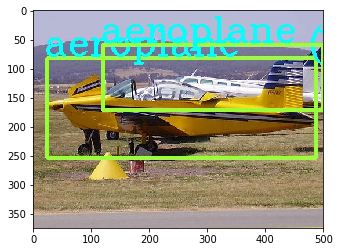

In [30]:
im_path = '/home/syh/train_data/VOCdevkit/VOC2007/JPEGImages_with_bbox/005927.jpg'
im = load_image(im_path)
view_image(im)